In [73]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
#loading required dataset
st = pd.read_csv("Titanic-Dataset.csv")  #survival test=st

In [75]:
st.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1,inplace=True)
st['Age']=st['Age'].fillna(st['Age'].mean())
st['Embarked']=st['Embarked'].fillna(st['Embarked'].mode()[0])


In [76]:
# text to numbers
le = LabelEncoder()
st['Sex'] = le.fit_transform(st['Sex'])         
st['Embarked'] = le.fit_transform(st['Embarked'])

In [77]:
X = st.drop('Survived', axis=1)
y = st['Survived']

In [78]:
#training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [80]:
#metrices
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [81]:
# prediction
new_passenger_df = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 1,
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 2
}])

prediction = model.predict(new_passenger_df)[0]

if prediction == 1:
    print("\nPrediction: The passenger SURVIVED.")
else:
    print("\nPrediction: The passenger DID NOT survive.")



Prediction: The passenger DID NOT survive.


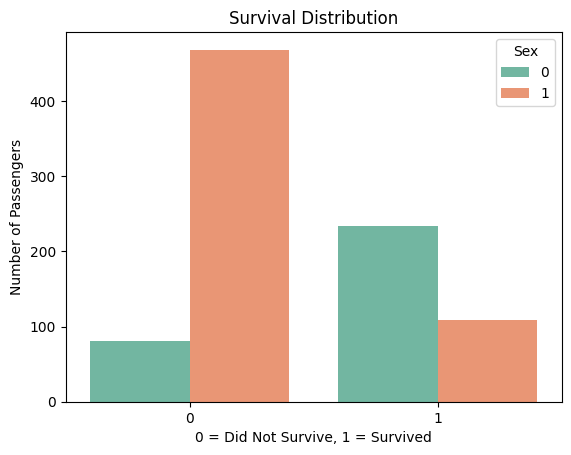

In [82]:
# Plot survival count
sns.countplot(x='Survived', hue='Sex', data=st, palette='Set2')
plt.title("Survival Distribution")
plt.xlabel("0 = Did Not Survive, 1 = Survived")
plt.ylabel("Number of Passengers")
plt.show()


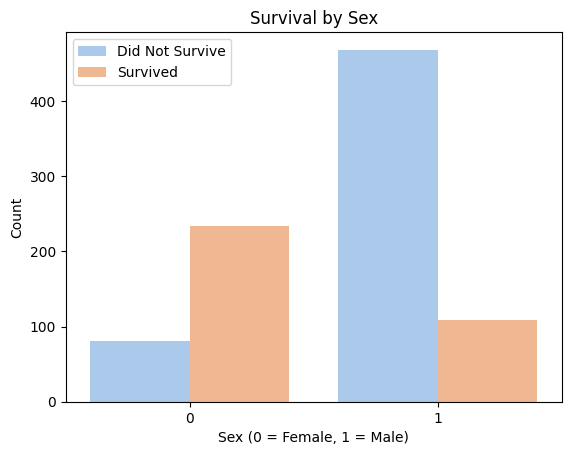

In [83]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=st, palette='pastel')
plt.title("Survival by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

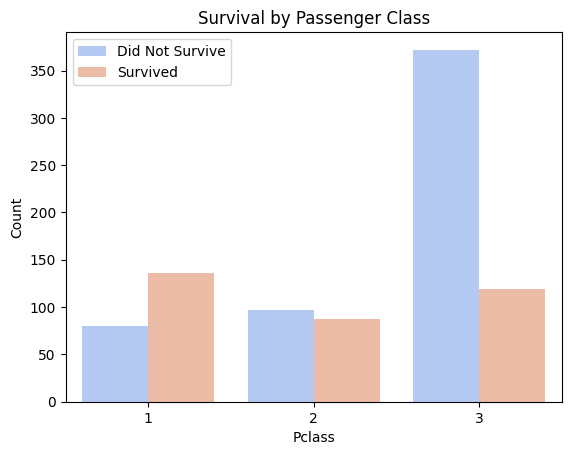

In [84]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=st, palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()
